In [657]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [658]:
car_df = pd.read_csv("imports-85.data")
car_df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [659]:
car_df.head(2).transpose()

,0,1
symboling,3,3
normalized_losses,?,?
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
num_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


In [660]:
car_df = car_df.replace('?', np.nan)


In [661]:
car_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [662]:
car_df = car_df.drop(['make',
                'fuel_type',
                'engine_location',
                'num_of_doors',
                'body_style',
                'drive_wheels',
                'engine_type',
                'fuel_system',
                'aspiration',
                'normalized_losses'],
                axis=1
)

In [663]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [664]:
car_df['cylinder'] = car_df['num_of_cylinders'].replace({
        'one': 1, 
        'two': 2, 
        'three': 3, 
        'four': 4, 
        'five':5, 
        'six': 6, 
        'seven': 7, 
        'eight': 8, 
        'nine': 9, 
        'ten': 10, 
        'eleven': 11, 
        'twelve': 12})

In [665]:
car_df = car_df.replace('?',np.nan)

In [708]:
car_df.drop('num_of_cylinders',1,inplace=True)
car_df['bore'] = car_df['bore'].astype('float64')
car_df['stroke']= car_df['stroke'].astype('float64')
car_df['horsepower']= car_df['horsepower'].astype('float64')
car_df['peak_rpm']= car_df['peak_rpm'].astype('float64')
car_df['price'] = car_df['price'].astype('float64')


C:\Users\P.Jay\AppData\Local\Temp/ipykernel_7472/3045389461.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  car_df.drop('num_of_cylinders',1,inplace=True)


In [709]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
cylinder               int64
dtype: object

In [710]:
car_df['price'] = car_df['price'].fillna(car_df['price'].median())
car_df['bore']= car_df['bore'].fillna(car_df['bore'].median())
car_df['horsepower'] = car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peak_rpm'] = car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['cylinder'] = car_df['cylinder'].fillna(car_df['cylinder'].median())


In [711]:
car_df[car_df.isnull().any(1)]

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,cylinder


In [714]:
X = car_df.drop(['price'],1)
X

C:\Users\P.Jay\AppData\Local\Temp/ipykernel_7472/3834489.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = car_df.drop(['price'],1)


,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,cylinder
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,4
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,4
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,6
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,4
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,4
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,4
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,6
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,6


In [715]:

X

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,cylinder
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,4
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,4
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,6
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,4
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,4
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,4
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,6
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,6


In [716]:
y = car_df[['price']]
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [717]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [718]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [719]:
accuracy = model.score(X_test,y_test)
accuracy

0.7879978655483207

In [720]:
car_df.describe(include='all')

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,cylinder
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329366,3.256098,10.142537,104.165854,5126.097561,25.219512,30.751220,13150.307317,4.380488
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270858,0.313634,3.972040,39.529733,477.035772,6.542142,6.886443,7879.121326,1.080854
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,2.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,4.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,4.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,4.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,12.000000


In [721]:
car_df[car_df.isnull().any(axis=1)]

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,cylinder


In [722]:
# import seaborn as sns
# sns.pairplot(data =car_df, diag_kind='kde')

In [723]:
from matplotlib import pyplot as plt

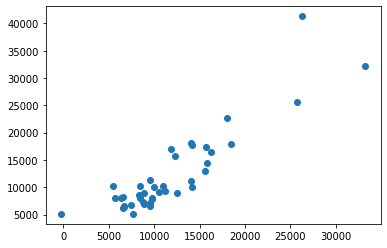

In [724]:
predict_y = model.predict(X_test)
plt.scatter(predict_y,y_test)

In [725]:
intercept = model.intercept_[0]
print("The intercept of our model = {}".format(intercept))

The intercept of our model = -12917.468649542889


In [726]:
X_train.columns

Index(['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'cylinder'],
      dtype='object')

In [727]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient of {} = {}".format(col_name,model.coef_[0][idx]))

The coefficient of symboling = 69.13830070372138
The coefficient of wheel_base = 53.013759591548954
The coefficient of length = -102.90091523978768
The coefficient of width = 555.1257846884433
The coefficient of height = 295.5304547316139
The coefficient of curb_weight = -0.5996705821305355
The coefficient of engine_size = 242.25878650422547
The coefficient of bore = -6567.81739012045
The coefficient of stroke = -5009.477712566803
The coefficient of compression_ratio = 353.7202489670988
The coefficient of horsepower = 0.6178403040999276
The coefficient of peak_rpm = 2.3303566128380524
The coefficient of city_mpg = -189.14015701366014
The coefficient of highway_mpg = -63.700807475288336
The coefficient of cylinder = -3145.416173351999


Odinary Least Squares

In [728]:
data_train = pd.concat([X_train,y_train],axis=1)
data_train.head(5)

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,cylinder,price
106,1,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,160.0,5200.0,19,25,6,18399.0
90,1,94.5,165.3,63.8,54.5,2017,103,2.99,3.47,21.9,55.0,4800.0,45,50,4,7099.0
147,0,97.0,173.5,65.4,53.0,2455,108,3.62,2.64,9.0,94.0,5200.0,25,31,4,10198.0
185,2,97.3,171.7,65.5,55.7,2212,109,3.19,3.40,9.0,85.0,5250.0,27,34,4,8195.0
95,1,94.5,165.6,63.8,53.3,2028,97,3.15,3.29,9.4,69.0,5200.0,31,37,4,7799.0


In [729]:
data_train.columns

Index(['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'cylinder', 'price'],
      dtype='object')

In [730]:
import statsmodels.formula.api as smf

In [731]:
car_stat = smf.ols('price ~ symboling + wheel_base + length + width + height + curb_weight + engine_size + bore + stroke + compression_ratio + horsepower + peak_rpm + city_mpg + highway_mpg + cylinder',data = data_train).fit()
car_stat.params

Intercept           -12917.468650
symboling               69.138301
wheel_base              53.013760
length                -102.900915
width                  555.125785
height                 295.530455
curb_weight             -0.599671
engine_size            242.258787
bore                 -6567.817390
stroke               -5009.477713
compression_ratio      353.720249
horsepower               0.617840
peak_rpm                 2.330357
city_mpg              -189.140157
highway_mpg            -63.700807
cylinder             -3145.416173
dtype: float64

In [732]:
print(car_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     48.80
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           1.63e-49
Time:                        12:50:08   Log-Likelihood:                -1559.4
No. Observations:                 164   AIC:                             3151.
Df Residuals:                     148   BIC:                             3200.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.292e+04   1.87e+0